<h1 style="color:blue">Simulation Project Part 3</h1>
<h1>Mohammad Saeed Zare Mehrjardi - 99243037</h1>
<h1>Zahra Sadat Esmati Baygi - 99243053 </h1>

In [32]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import math
import random
from scipy.stats import norm
import scipy
import sys
import graph as gr
import seaborn as sns
import pandas as pd

In [33]:
sys.setrecursionlimit(10000)

# demand 3

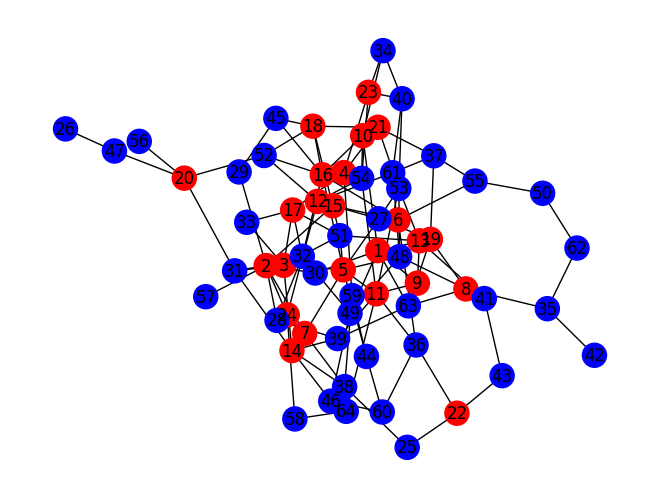

In [34]:
p = 0.5
n = 64
d1 = 10
d2 = 6


rsrg_graph, color_map = gr.RSRG(p, n, d1, d2)    

nx.draw(rsrg_graph, node_color=color_map, with_labels=True)
plt.show()

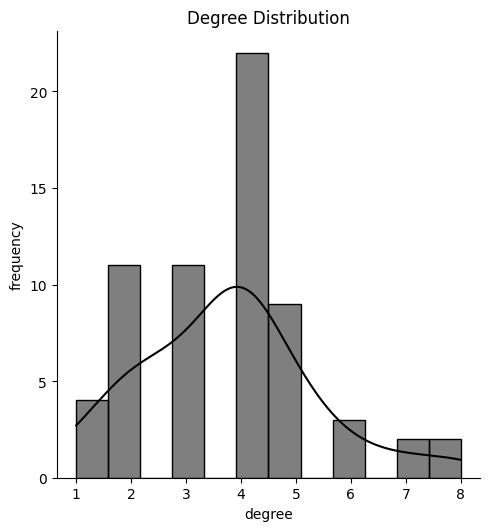

In [35]:
gr.draw_degree_distribution(rsrg_graph)

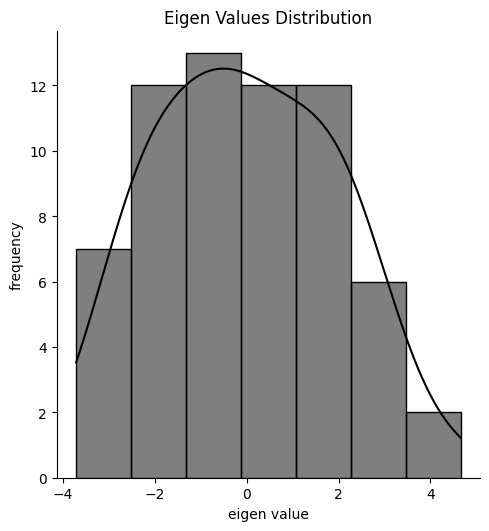

In [36]:
gr.draw_eigen_values_distribution(rsrg_graph)

In [37]:
# create a dataset of RSRG graphs
number_of_simulation = 100
p = 0.9
n = 100
d1 = 10
d2 = 15

spectral_gap = []
algebratic_connectivity = []
natural_connectivity = []
energy = []
laplacian_energy = []
symmetry_ratio = []

rsrg_table = []

for i in range(number_of_simulation):
    rsrg_graph, color_map = gr.RSRG(p, n, d1, d2) 
    sg = gr.spectral_gap(rsrg_graph)
    ac = gr.algebraic_connectivity(rsrg_graph)
    ng = gr.natural_connectivity(rsrg_graph)
    r = gr.symmetry_ratio(rsrg_graph)
    e = gr.energy(rsrg_graph)
    le = gr.laplacian_energy(rsrg_graph)
    
    spectral_gap.append(sg)
    algebratic_connectivity.append(ac)
    energy.append(e)
    laplacian_energy.append(le)
    symmetry_ratio.append(r)
    natural_connectivity.append(ng)
    
    rsrg_table.append([n, d1, d2, p, sg, ac, ng, r, e, le])
    


In [38]:
# create dataframe for rsrg set
cols = ['n', 'd1', 'd2', 'p', 'spectral gap', 'algebratic connectivity', 'natural connectivity', 'r', 'energy', 'laplacian energy']
df = pd.DataFrame(rsrg_table, columns=cols, index=range(1, 101))  
df.head(30)

,n,d1,d2,p,spectral gap,algebratic connectivity,natural connectivity,r,energy,laplacian energy
1,100,10,15,0.9,5.888994,4.262141,6.864410,20.0,273.899525,341.993212
2,100,10,15,0.9,5.378999,4.475661,6.863123,25.0,272.845153,344.549153
3,100,10,15,0.9,5.361468,4.183551,6.657898,25.0,268.458346,337.391495
4,100,10,15,0.9,5.538222,4.441754,6.886754,25.0,272.192310,347.112476
5,100,10,15,0.9,5.617370,4.446018,7.036985,25.0,272.063614,349.455791
6,100,10,15,0.9,5.727130,4.122485,6.864019,25.0,271.164267,350.668521
7,100,10,15,0.9,5.455338,3.803620,6.619814,20.0,268.009554,344.057934
8,100,10,15,0.9,5.490986,3.988785,6.807646,25.0,272.793537,343.307521
9,100,10,15,0.9,5.936677,4.781126,7.008450,25.0,274.358278,343.458583
10,100,10,15,0.9,5.221187,4.233495,6.758806,25.0,270.433636,344.121187


In [39]:
df.mean(0)

n                          100.000000
d1                          10.000000
d2                          15.000000
p                            0.900000
spectral gap                 5.570177
algebratic connectivity      4.350575
natural connectivity         6.805835
r                           23.700000
energy                     271.704458
laplacian energy           343.010606
dtype: float64

# Spectral Gap

mean is 5.570177197983002
standard deviation is 0.19124749156083554
CI is (5.532692689637078, 5.607661706328925)


(5.570177197983002,
 0.19124749156083554,
 0.03748450834592377,
 (5.532692689637078, 5.607661706328925))

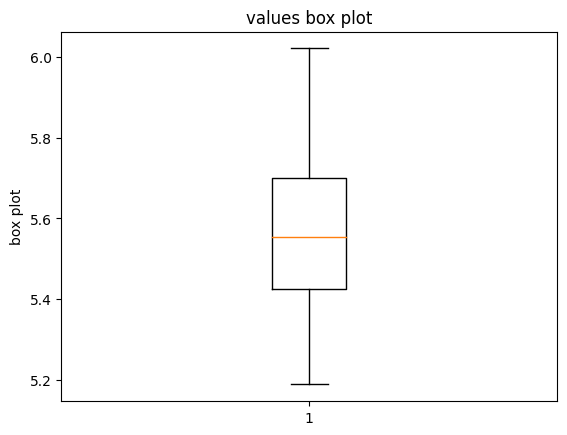

In [40]:
gr.calculate_statistics_parameters(spectral_gap)   

# Algebratic Connectivity

mean is 4.350574998207
standard deviation is 0.24295061596211856
CI is (4.3029566774784245, 4.398193318935575)


(4.350574998207,
 0.24295061596211856,
 0.047618320728575234,
 (4.3029566774784245, 4.398193318935575))

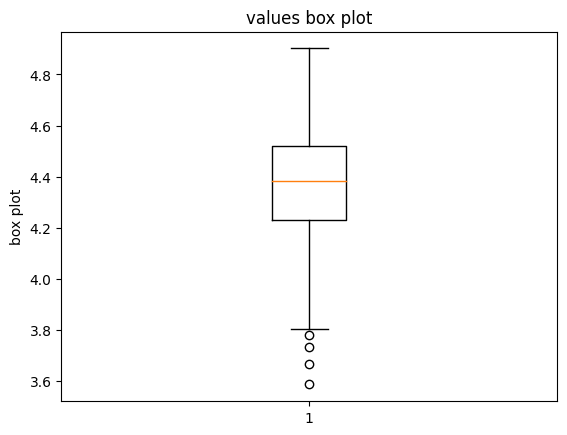

In [41]:
gr.calculate_statistics_parameters(algebratic_connectivity)

# Natural Connectivity

mean is 6.805835228776999
standard deviation is 0.14878864531757616
CI is (6.776672654294754, 6.834997803259244)


(6.805835228776999,
 0.14878864531757616,
 0.029162574482244925,
 (6.776672654294754, 6.834997803259244))

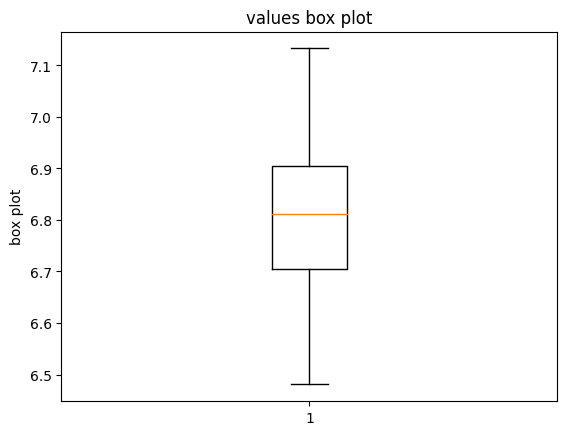

In [42]:
gr.calculate_statistics_parameters(natural_connectivity)

# Energy

mean is 271.704458322443
standard deviation is 1.8718464023389898
CI is (271.3375764275845, 272.07134021730144)


(271.704458322443,
 1.8718464023389898,
 0.36688189485844197,
 (271.3375764275845, 272.07134021730144))

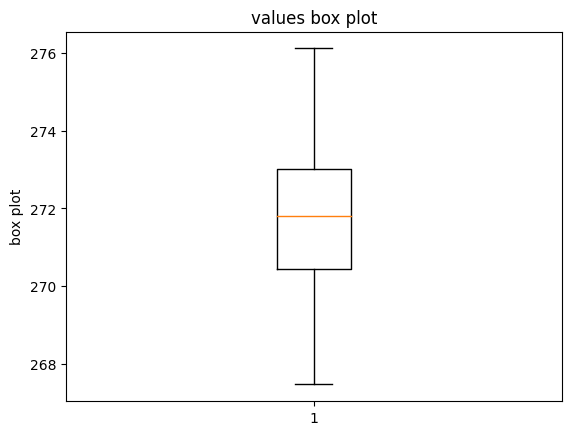

In [43]:
gr.calculate_statistics_parameters(energy)

# Laplacian Energy

mean is 343.0106055643199
standard deviation is 6.118173292120062
CI is (341.8114435990644, 344.20976752957546)


(343.0106055643199,
 6.118173292120062,
 1.199161965255532,
 (341.8114435990644, 344.20976752957546))

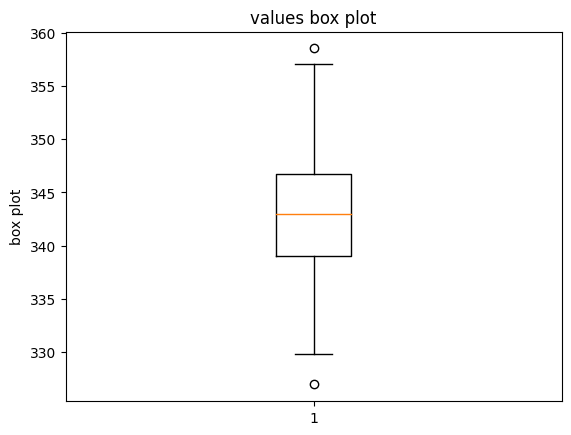

In [44]:
gr.calculate_statistics_parameters(laplacian_energy)

# Symmetry Ratio

mean is 23.7
standard deviation is 2.193171219946131
CI is (23.27013844089056, 24.12986155910944)


(23.7,
 2.193171219946131,
 0.4298615591094417,
 (23.27013844089056, 24.12986155910944))

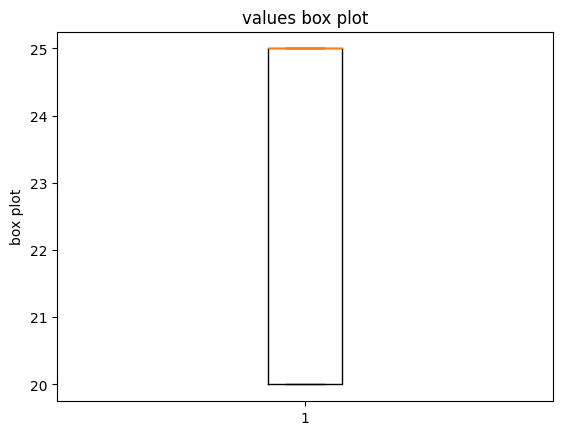

In [45]:
gr.calculate_statistics_parameters(symmetry_ratio)

# Compare RSRG, RSRBG, ER
we consider graphs with same n, p, d

In [46]:
number_of_simulation = 100
n = 120
p = 0.5
d1 = 15
d2 = 25

er_graphs = [] # ER graph dataset
rsrg_graphs = [] # RSRG graph dataset
rsrbg_graphs = [] # RSRBG graph

for i in range(number_of_simulation):
    er_graphs.append(nx.gnp_random_graph(n, p))
    rsrg_graphs.append(gr.RSRG(p, n, d1, d2))
    rsrbg_graphs.append(gr.RSRBG(n, d1, d2))

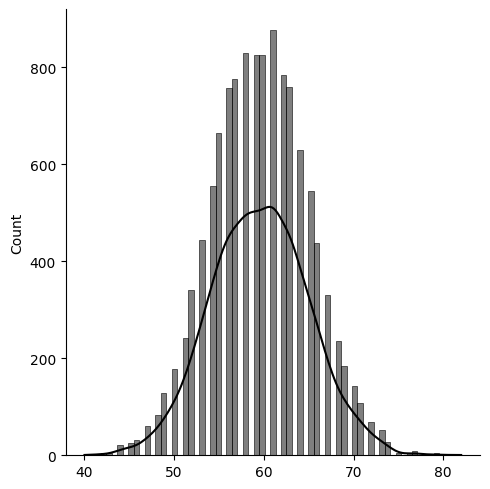

In [47]:
er_degrees = []
for er in er_graphs:
    degrees = [d for n, d in er.degree()]
    er_degrees += degrees
    
sns.displot(er_degrees, kde=True, color="black")

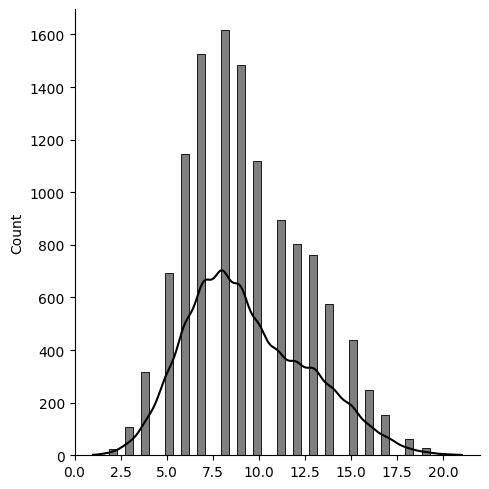

In [48]:
# sample for 100 rsrg graph
rsrg_degrees = []
for rsrg in rsrg_graphs:
    degrees = [d for n, d in rsrg[0].degree()]
    rsrg_degrees += degrees

sns.displot(rsrg_degrees, kde=True, color="black")    

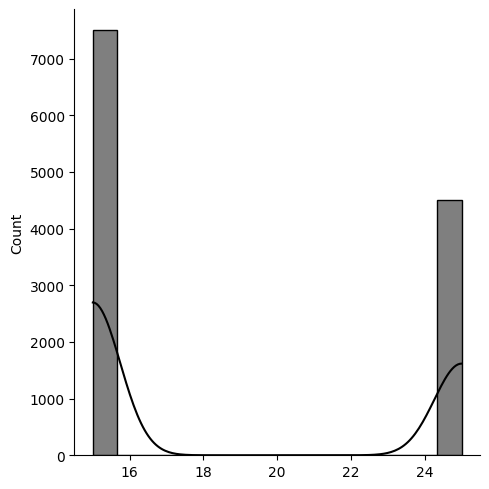

In [49]:
# rsrbg degree
rsrbg_degrees = []
for rsrbg in rsrbg_graphs:
    degrees = [d for n, d in rsrbg[0].degree()]
    rsrbg_degrees += degrees

sns.displot(rsrbg_degrees, kde=True, color="black")  

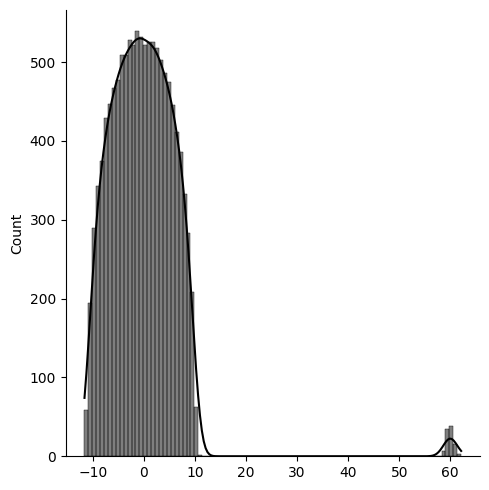

In [50]:
er_eigen_vals = []
for er in er_graphs:
    er_eigen_vals += list(gr.adjacency_eigen_values(er))
    
sns.displot(er_eigen_vals, kde=True, color="black")

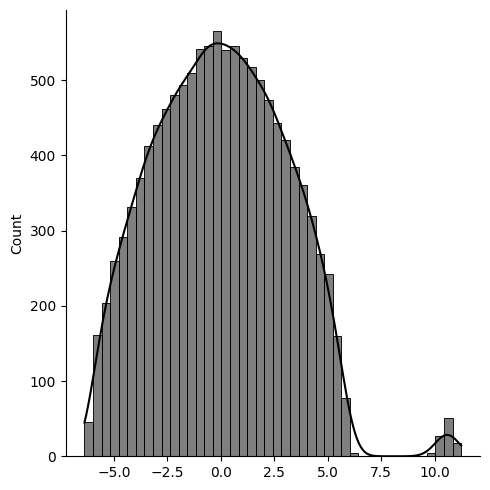

In [51]:
rsrg_eigen_vals = []

for rsrg in rsrg_graphs:
    rsrg_eigen_vals += list(gr.complex_abs(gr.adjacency_eigen_values(rsrg[0])))
    
sns.displot(rsrg_eigen_vals, kde=True, color="black")

# rsrbg eigen values

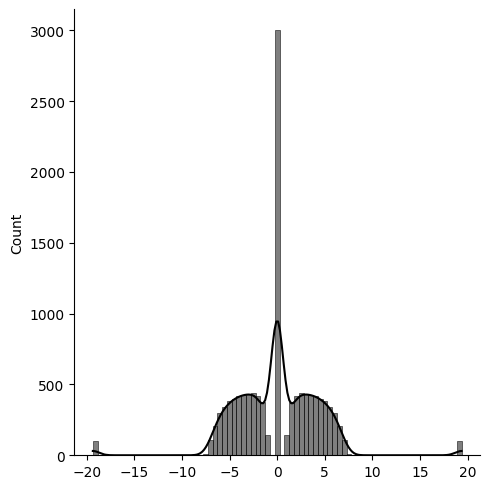

In [52]:
rsrbg_eigen_vals = []

for rsrbg in rsrbg_graphs:
    rsrbg_eigen_vals += list(gr.complex_abs(gr.adjacency_eigen_values(rsrbg[0])))
    
sns.displot(rsrbg_eigen_vals, kde=True, color="black")

# Algebratic Connectivity Distribution

In [53]:
number_of_simulation = 100

n = 500
p = 0.9
d1 = 4
d2 = 16


rsrg_graphs = []
for _ in range(number_of_simulation):
    rsrg = gr.RSRG(p, n, d1, d2)[0]
    rsrg_graphs.append(rsrg)   

mean is 0.625753562396
standard deviation is 0.19683263810954707
CI is (0.5871743653265288, 0.6643327594654712)


(0.625753562396,
 0.19683263810954707,
 0.03857919706947123,
 (0.5871743653265288, 0.6643327594654712))

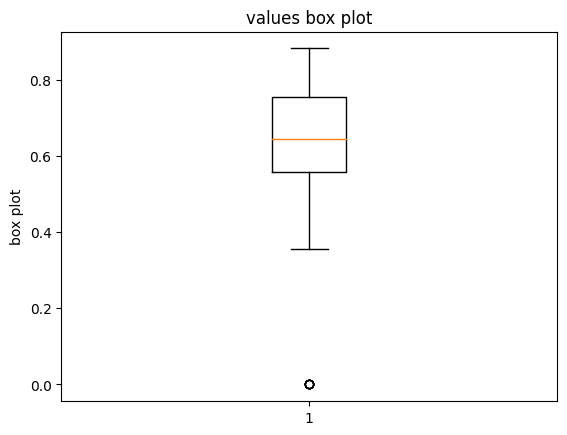

In [54]:
algebtatic_connectivity = []
for rsrg in rsrg_graphs:
    al = gr.algebraic_connectivity(rsrg)
    algebtatic_connectivity.append(al)

gr.calculate_statistics_parameters(algebtatic_connectivity)

Text(0.5, 1.0, 'algebtatic_connectivity Distribution')

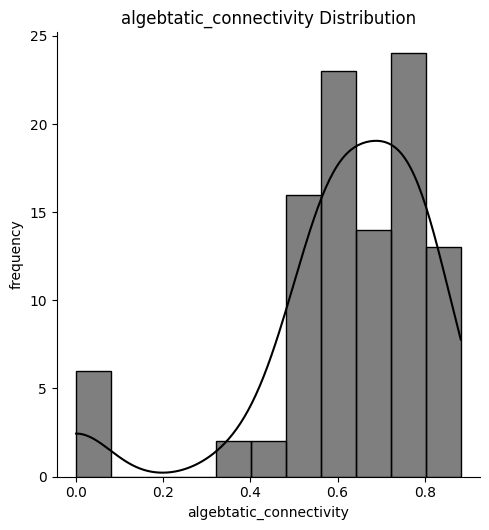

In [55]:
sns.displot(algebtatic_connectivity, kde=True, color="black")
plt.xlabel('algebtatic_connectivity')
plt.ylabel("frequency")
plt.title(f"algebtatic_connectivity Distribution")

# Algebratic Connectivity PDF

In [75]:
# number of nodes
n = 480

# probability
p = np.array(np.arange(0, 1.0001, 0.03125))

# degrees
average_degree = 8 + 4 * p # 2 + 4p

# find d1, d2 with limit 100
limit = 200

d = []

for i in range(len(p)):
    for d1 in range(2, limit):
        for d2 in range(2, limit):
            if (1-p[i]) * d1 + p[i] * d2 == average_degree[i] and (n % (d1 + d2)) == 0:
                d.append((d1, d2))
                break
        else:
            continue
        break   

print(p, end='\n\n')
print(average_degree, end='\n\n')
print(d, end='\n\n')


[0.      0.03125 0.0625  0.09375 0.125   0.15625 0.1875  0.21875 0.25
 0.28125 0.3125  0.34375 0.375   0.40625 0.4375  0.46875 0.5     0.53125
 0.5625  0.59375 0.625   0.65625 0.6875  0.71875 0.75    0.78125 0.8125
 0.84375 0.875   0.90625 0.9375  0.96875 1.     ]

[ 8.     8.125  8.25   8.375  8.5    8.625  8.75   8.875  9.     9.125
  9.25   9.375  9.5    9.625  9.75   9.875 10.    10.125 10.25  10.375
 10.5   10.625 10.75  10.875 11.    11.125 11.25  11.375 11.5   11.625
 11.75  11.875 12.   ]

[(8, 2), (6, 74), (6, 42), (8, 12), (6, 26), (8, 12), (2, 38), (8, 12), (2, 30), (8, 12), (8, 12), (8, 12), (2, 22), (8, 12), (8, 12), (8, 12), (2, 18), (8, 12), (8, 12), (8, 12), (8, 12), (8, 12), (8, 12), (8, 12), (2, 14), (8, 12), (8, 12), (8, 12), (8, 12), (8, 12), (8, 12), (8, 12), (3, 12)]



In [ ]:
# simulation size
number_of_simulation = 100

# number of nodes
n = 480

# algebratic connectivities
table = []

for i in range(len(p)):
    prob = p[i]
    
    print(i)
    d1 = d[i][0]
    d2 = d[i][1]
    print(d1, d2)
    
    rsrg_graphs = []
    ac = []
    for _ in range(number_of_simulation):
        
        rsrg = gr.RSRG(prob, n, d1, d2)[0]

        ac.append(gr.algebraic_connectivity(rsrg))
        rsrg_graphs.append(rsrg)

    table.append([n, d1, d2, prob, np.mean(ac)])

0
8 2
1
6 74
2
6 42
3
8 12
4
6 26
5
8 12
6
2 38
7
8 12
8
2 30
9
8 12
10
8 12
11
8 12
12
2 22
13
8 12
14
8 12
15
8 12
16
2 18
17
8 12
18
8 12
19
8 12
20
8 12
21
8 12


In [ ]:
rsrg_df = pd.DataFrame(table, columns = ['n', 'd1', 'd2', 'p', 'algebratic connectivity'])
rsrg_df

In statistics, a multimodal distribution is a probability distribution with more than one mode.

In [ ]:
c = rsrg_df['p']
p = rsrg_df['algebratic connectivity']
plt.scatter(c, p)

plt.ylabel("algebratic connectivity")
plt.xlabel("p")